In [37]:
import cluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.style.use({'figure.figsize':(12, 12)}) # 画布大小
sns.set_style('whitegrid')  # 风格样式
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


In [3]:
data_path=cluster.data_path
info_path=cluster.info_path
node= pd.read_csv(f'{data_path}node.csv',encoding='utf_8_sig')
result= pd.read_csv(f'./data/kmeans_result.csv',encoding='utf_8_sig')

In [4]:
print('ok')
node=pd.merge(left=node,right=result,left_on='id',right_on='id')
# node['pagerank']=pd.read_csv('node_pagerank.csv',usecols=['pageranks'])

ok


# 不同类别人的词云

In [ ]:
# tag=node[~node['prop_adj_list'].isna()]['prop_adj_list'].tolist()
from tqdm import tqdm
import wordcloud
for name,group in tqdm(node.groupby('cluster_result')):
    tag=[]
    for cell in group[~group['prop_adj_list'].isna()]['prop_adj_list']:
        tag.extend(eval(cell))
    # tag=list(set(tag))
    if not len(tag):
        continue
    w_str=' '.join(tag)
    w=wordcloud.WordCloud(font_path='c:\windows\Fonts\simhei.ttf',background_color='white',     )
    w.generate(w_str)
    plt.show()
    w.to_file(f'{cluster.info_path}user{name}_battery_word_cloud.png')

# 分词看不同人主要讨论什么

In [5]:
import re
import jieba
tag=[]
for cell in node[~node['prop_adj_list'].isna()]['prop_adj_list']:
    tag.extend(eval(cell))
tag=list(set(tag))
tag=[i for i in tag if re.findall(u"[\u4e00-\u9fa5]+",i)]


# 对句子进行中文分词
def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    sentence_depart = jieba.cut(sentence.strip())
    tmp=[]
    for word in sentence_depart:
        tmp.append(word)
    return tmp
component=[]
for t in tag:
    sentence_depart = jieba.cut(t.strip())
    for word in sentence_depart:
        component.append(word)
        break
component=list(set(component))
component = [token for token in component if len(token) > 1]

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\16691\AppData\Local\Temp\jieba.cache
Loading model cost 0.776 seconds.
Prefix dict has been built succesfully.


In [6]:
import json
print(component)
with open('component.json', 'w', encoding='utf8')as fp:
    json.dump(component, fp, ensure_ascii=False)


['版本', '噪点', '定位', '触屏', '白色', '颜色', '种类', '电源', '日期', '声音', '物流', '颗粒感', '待机', 'pro', '内存', '返回', '价格低', '内置', '指纹识别', '功能强大', '做工', '速度慢', '产品', '机身', '手机', '问题', '界面', '价格昂贵', '魅族', '差距', '寿命长', '音效', '能力', 'wifi', '耗电', '小米', '待机时间', '耳机', '图片', '质量', '处理器', '摄像', '屏幕', '指纹', '质感', '表现出色', '音量', '工艺', '销量', '机型', '战果', '天气', '后盖', '诺基亚', '缝隙', '充电', '电池', '配件', '费电', '垃圾', '像素', '网速慢', '接口', '使用寿命', '效率高', '总体', '电量', '发热量', '价格便宜', '软件', '兼容性', '售后服务', '主板', '照片', '驱动', '锁屏', '光线', '续航', '风扇', '内存不足', '眼睛', '音质', '海狗', '货源充足', '兼容', '机器', '温度', '功能', '掉电', '提升', '外表', '电池容量', 'mx6', '发热', '蓝牙', '使用方便', '运行', '表现', '开机', '边框', '品牌', '画质', '操作系统', '技术', '外观', '网络', '华为', '毛病', '手感', '显示屏', '体验', '价位', '容量', '配置', '环境', '成本', '优化', '流量', '显示', '颜值', '网速', '动画', '机子', '效果', '上网', '清晰度', '商品', '自拍', '功耗', '黑色', '三星', '分辨率', '刷机', '通话', '生日快乐', '下载速度', '硬件', '打字', '性价', '价格', '打字速度', '手机电池', '输入法', '玩游戏', '按键', '性能', '海军', '价格公道', '售价', '客服', '看着', '反应', '颗粒', '应用', '发货', '拍照', '性价比', '

In [31]:
import re
tmp=[]
for key in component:
    if re.search('电|续航',key):
        tmp.append(key)
print(tmp)

['电源', '耗电', '充电', '电池', '费电', '电量', '续航', '掉电', '电池容量', '手机电池', '电脑']


# 找出关于电池的帖子
# 统计不同人群的满意度

In [39]:
import os
print('--提取特征--')
# file_names = os.listdir(f'C:\\Users\\16691\\Desktop\\opinion_detection\\tieba_spider\\tieba_spider\\spiders\\')  # 路径
file_names = os.listdir(f'../tieba_spider/tieba_spider/spiders/data/')  # 路径
print(file_names)
user_post = (re.findall(f'user_L[0-9]+_post_filter.csv', ''.join(file_names)))
print(len(user_post))
post=pd.DataFrame()
for file in user_post:
    file=f'{cluster.data_path}{file}'
    post =post.append(pd.read_csv(file, encoding='utf_8_sig'))

--提取特征--
['caculate_comment_sentiment.ipynb', 'caculate_sentiment_use_api.ipynb', 'comment.csv', 'edge.csv', 'extract_user_from_last_floor.ipynb', 'generate_node.ipynb', 'graphsage_feats.csv', 'node.csv', 'opinion_extract.ipynb', 'post2lda.ipynb', 'temp.csv', 'temp.ipynb', 'user_document.csv', 'user_L1.csv', 'user_L10.csv', 'user_L10_post.csv', 'user_L10_post_classify.csv', 'user_L10_post_comment.csv', 'user_L10_post_filter.csv', 'user_L11.csv', 'user_L11_post.csv', 'user_L11_post_classify.csv', 'user_L11_post_comment.csv', 'user_L11_post_filter.csv', 'user_L11_post_filter_temp.csv', 'user_L12.csv', 'user_L12_post.csv', 'user_L1_post.csv', 'user_L1_post_classify.csv', 'user_L1_post_comment.csv', 'user_L1_post_filter.csv', 'user_L2.csv', 'user_L2_post.csv', 'user_L2_post_classify.csv', 'user_L2_post_comment.csv', 'user_L2_post_filter.csv', 'user_L3.csv', 'user_L3_post.csv', 'user_L3_post_classify.csv', 'user_L3_post_comment.csv', 'user_L3_post_filter.csv', 'user_L4.csv', 'user_L4_post.c

In [40]:
# comment_file = (re.findall(f'user_L[0-9]+_post_comment.csv', ''.join(file_names)))
comment = pd.read_csv('comment.csv')
# print(len(comment_file))
# comment=pd.DataFrame()
# for file in comment_file:
#     file=f'{cluster.data_path}{file}'
#     comment =comment.append(pd.read_csv(file, encoding='utf_8_sig'))
comment.drop(comment[comment['author_user_name']==comment['reply2user']].index,inplace=True)
comment.reset_index(inplace=True,drop=True)

post=pd.merge(left=post,right=node[['author_user_name','cluster_result']],left_on='author_user_name',right_on='author_user_name',how='left')
post.reset_index(inplace=True,drop=True)

# 提取出来

100%|██████████| 3/3 [00:08<00:00,  2.78s/it]


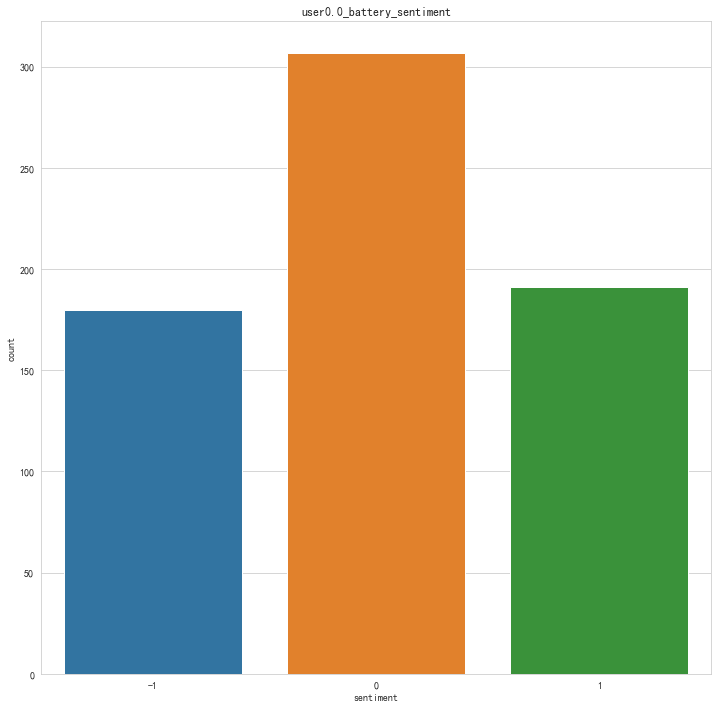

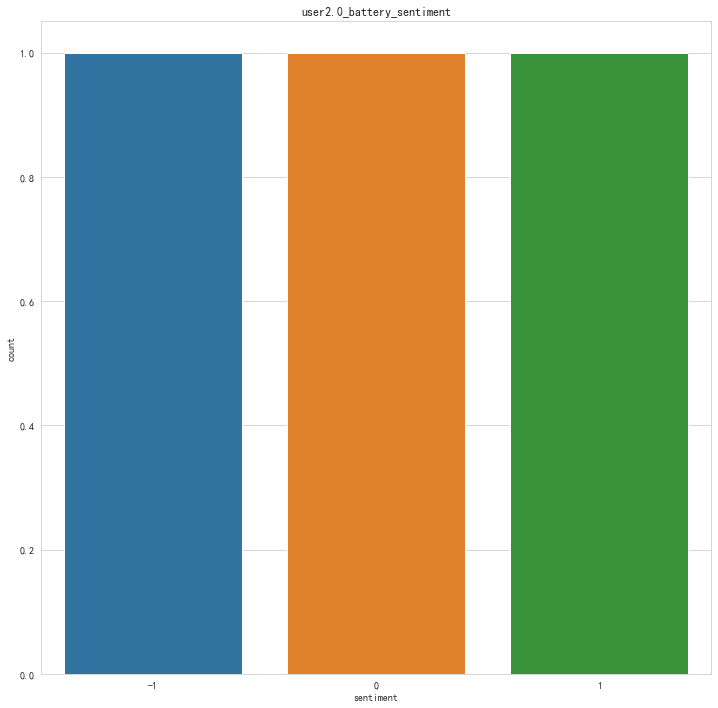

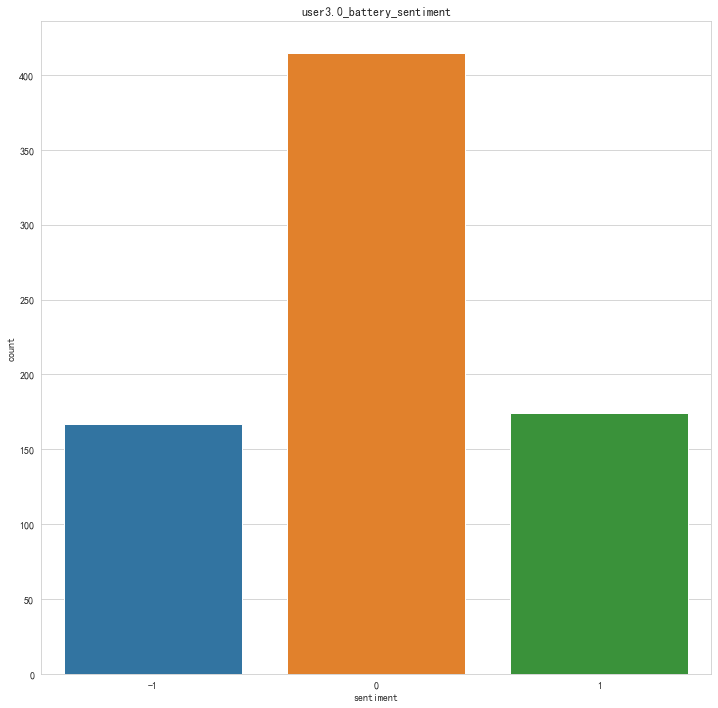

In [72]:
from snownlp import SnowNLP
battery_component=['电池', '电量', '掉电', '手机电池', '费电', '电源', '耗电', '充电', '电池容量']
battery_post_id_list=[]
for name,group in tqdm(post.groupby( 'cluster_result')):
    reg='|'.join(battery_component)
    # print(group[group['prop_adj_list'].str.contains(f'{reg}')])
    battery_post_id_list=group[group['prop_adj_list'].str.contains(f'{reg}')]['post_id'].tolist()
    battery_post_sentiment_list=group[group['prop_adj_list'].str.contains(f'{reg}')]['sentiment_list'].apply(lambda x:eval(x)).tolist()
    battery_post_sentiment_list=[i[0] for i in battery_post_sentiment_list]
    # break
    battery_pd=pd.DataFrame()
    for post_id in battery_post_id_list:
        battery_pd=battery_pd.append(comment[comment['post_id']==post_id])
    battery_pd.reset_index(inplace=True,drop=True)
    # 计算
    battery_pd['score']=None
    battery_pd['sentiment']=None
    for index,row in battery_pd.iterrows():
        battery_pd.at[index,'score']=SnowNLP(row['content']).sentiments
    battery_pd.loc[battery_pd['score']>=0.7,'sentiment']=1
    battery_pd.loc[battery_pd[(0.3<battery_pd['score'])&(battery_pd['score']<0.7)].index,'sentiment']=0
    battery_pd.loc[battery_pd['score']<=0.3,'sentiment']=-1

    # 根据帖子的极性进行反转
    for post_id,origin_sentiment in zip(battery_post_id_list,battery_post_sentiment_list):
        if origin_sentiment==0:
            battery_pd.loc[battery_pd[battery_pd['post_id']==post_id].index,'sentiment']=[-1*i for i in battery_pd[battery_pd['post_id']==post_id]['sentiment'].values]
    sns.countplot(data=battery_pd,x='sentiment')
    plt.title(f'user{name}_battery_sentiment')
    plt.savefig(f'{cluster.info_path}user{int(name)}_battery_sentiment.png')
    plt.show()
    # break


In [64]:
print( battery_pd[battery_pd['post_id']==post_id]['sentiment'].values)
print(battery_pd[battery_pd['post_id']==post_id].index)
print([-1*i for i in battery_pd[battery_pd['post_id']==post_id]['sentiment'].values])

[-1 0 0 -1 0 0 -1 -1 0 0 -1 0 0 -1]
Int64Index([  650,   651,   652, 11051, 11052, 11053, 11054,   650,   651,
              652, 11051, 11052, 11053, 11054],
           dtype='int64')
[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]


# 屏幕|外观|价格

In [56]:
phone_features={}

tmp=[]
for key in component:
    if re.search('电|续航|烫',key):
        tmp.append(key)
tmp.remove('电脑')
print(tmp)
phone_features['电池']=tmp

tmp=[]
for key in component:
    if re.search('屏|清|视|亮|颗粒|画质|像素|分辨率',key):
        tmp.append(key)
print(tmp)
phone_features['屏幕']=tmp

tmp=[]
for key in component:
    if re.search('外|看|厚|边框|颜值',key):
        tmp.append(key)
print(tmp)
phone_features['外观']=tmp

tmp=[]
for key in component:
    if re.search('价格|性价比',key):
        tmp.append(key)
print(tmp)
phone_features['价格']=tmp

tmp=[]
for key in component:
    if re.search('拍|摄|照',key):
        tmp.append(key)
print(tmp)
phone_features['照相']=tmp

['电源', '耗电', '充电', '电池', '费电', '电量', '续航', '掉电', '电池容量', '手机电池']
['触屏', '颗粒感', '屏幕', '像素', '锁屏', '画质', '显示屏', '清晰度', '分辨率', '颗粒', '视频', '屏好', '亮度']
['外表', '边框', '外观', '颜值', '看着']
['价格低', '价格昂贵', '价格便宜', '价格', '价格公道', '性价比']
['摄像', '照片', '自拍', '拍照', '摄像头']


# 第一类人没有观点

100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


['外表', '边框', '外观', '颜值', '看着']
['外表', '边框', '外观', '颜值', '看着']
['外表', '边框', '外观', '颜值', '看着']


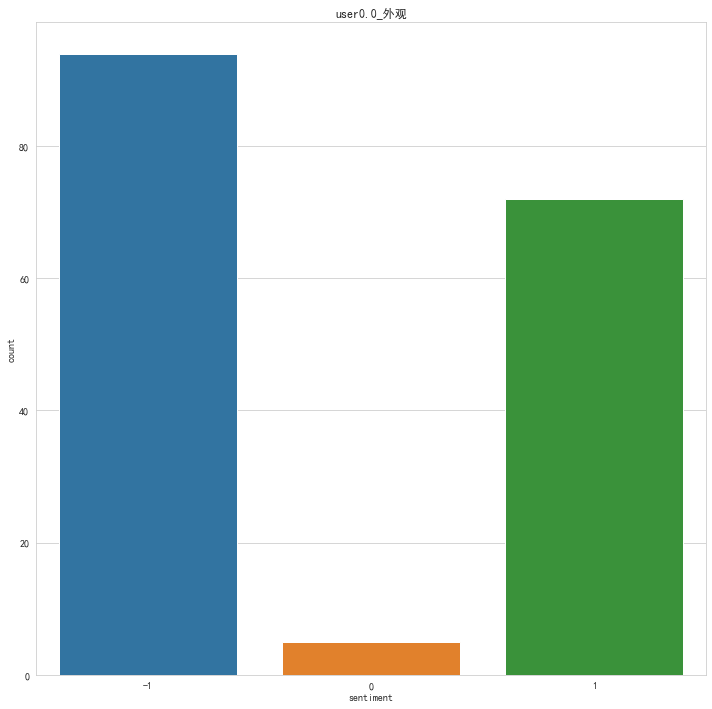

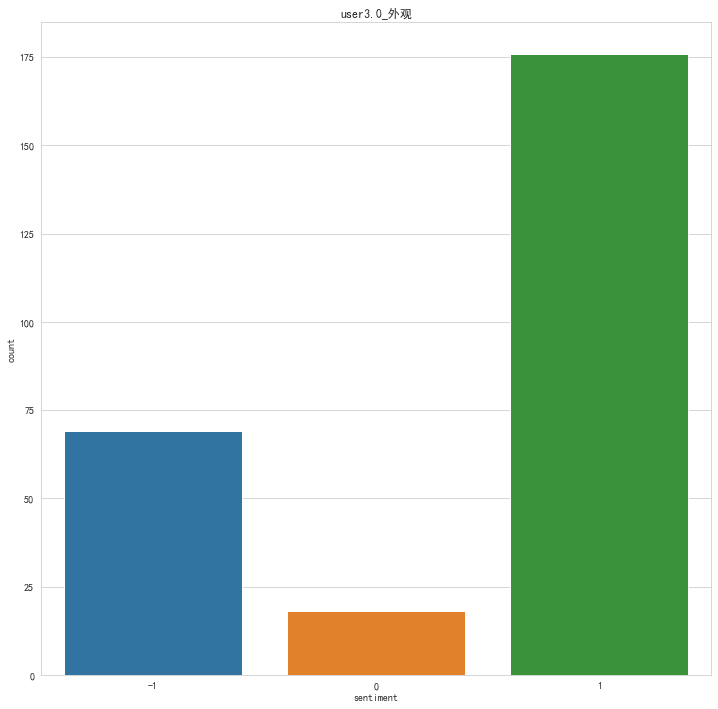

In [62]:
def show_feature(target):
    for name,group in tqdm(post.groupby('cluster_result')):
        print(phone_features[f'{target}'])
        reg='|'.join(phone_features[f'{target}'])
        # print(group[group['prop_adj_list'].str.contains(f'{reg}')])
        battery_post_id_list=group[group['prop_adj_list'].str.contains(f'{reg}')]['post_id'].tolist()
        battery_post_sentiment_list=group[group['prop_adj_list'].str.contains(f'{reg}')]['sentiment_list'].apply(lambda x:eval(x)).tolist()
        battery_post_sentiment_list=[i[0] for i in battery_post_sentiment_list]
        # break
        battery_pd=pd.DataFrame()
        for post_id in battery_post_id_list:
            battery_pd=battery_pd.append(comment[comment['post_id']==post_id])
        battery_pd.reset_index(inplace=True,drop=True)


        # 根据帖子的极性进行反转
        for post_id,origin_sentiment in zip(battery_post_id_list,battery_post_sentiment_list):
            if origin_sentiment==0:
                battery_pd.loc[battery_pd[battery_pd['post_id']==post_id].index,'sentiment']=[-1*i for i in battery_pd[battery_pd['post_id']==post_id]['sentiment'].values]

        if not battery_pd.shape[0]:
            continue
        sns.countplot(data=battery_pd,x='sentiment')
        plt.title(f'user{name}_{target}')
        plt.savefig(f'{cluster.info_path}user{int(name)}_{target}.png')
        plt.show()
# show_feature('电池')
# show_feature('屏幕')
# show_feature('照相')
# show_feature('价格')
show_feature('外观')

In [48]:
print(post['cluster_result'].unique())


[ 3.  0.  2. nan]
